In [2]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
#Read CSV and get an overview and some basic statistics of the dataset
heart=pd.read_csv("C:/Users/user/Desktop/heart.csv")
heart.head()
heart.describe()
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Checking for messing values
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Subsetting by age decade
heart20=heart.query("age<30")
heart30=heart.query("age>30 and age<40")
heart40=heart.query("age>40 and age<50")
heart50=heart.query("age>50 and age<60")
heart60=heart.query("age>60 and age<70")
heart70=heart.query("age>70 and age<80")
heart40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 2 to 299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       69 non-null     int64  
 1   sex       69 non-null     int64  
 2   cp        69 non-null     int64  
 3   trestbps  69 non-null     int64  
 4   chol      69 non-null     int64  
 5   fbs       69 non-null     int64  
 6   restecg   69 non-null     int64  
 7   thalach   69 non-null     int64  
 8   exang     69 non-null     int64  
 9   oldpeak   69 non-null     float64
 10  slope     69 non-null     int64  
 11  ca        69 non-null     int64  
 12  thal      69 non-null     int64  
 13  target    69 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 8.1 KB


In [6]:
heart['age_groups'] = pd.cut(x=heart['age'], bins=[20, 29, 39, 49, 59, 69, 79])


In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_groups
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(59, 69]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(29, 39]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(39, 49]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(49, 59]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(49, 59]"


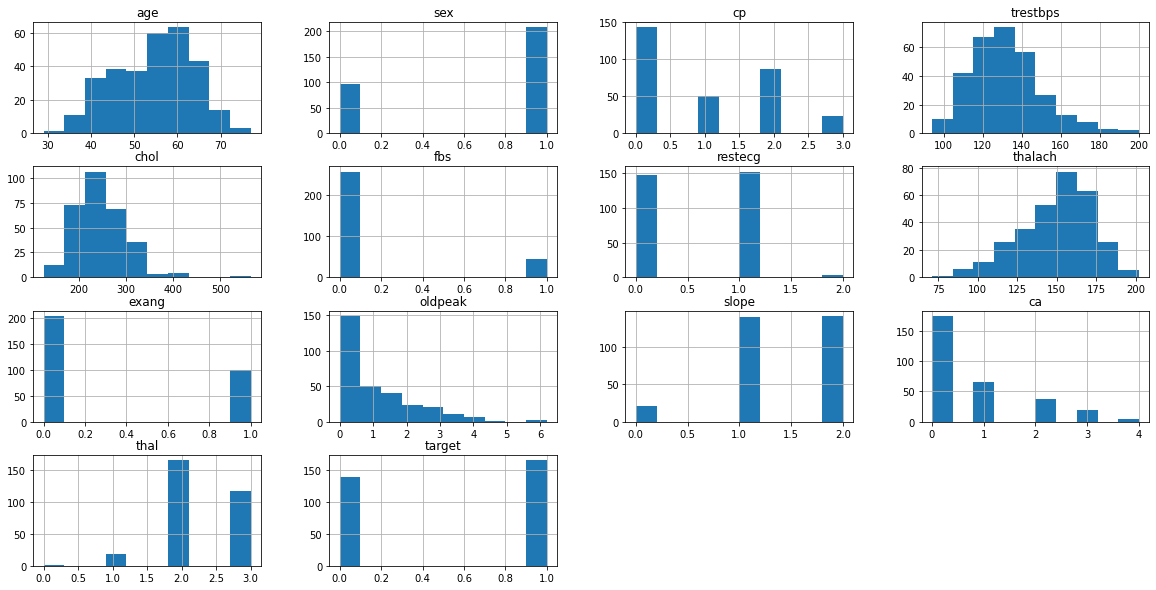

In [8]:
#Histograms
heart.hist(figsize=(20,10))
plt.show()

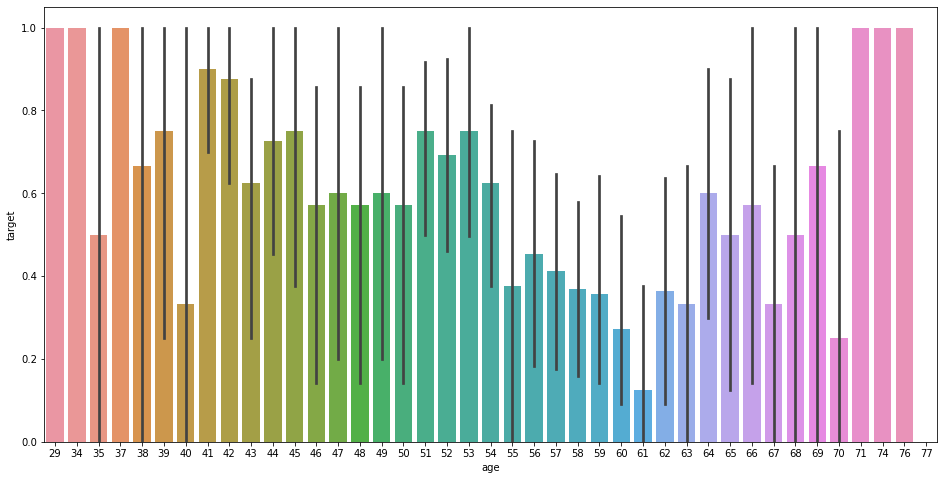

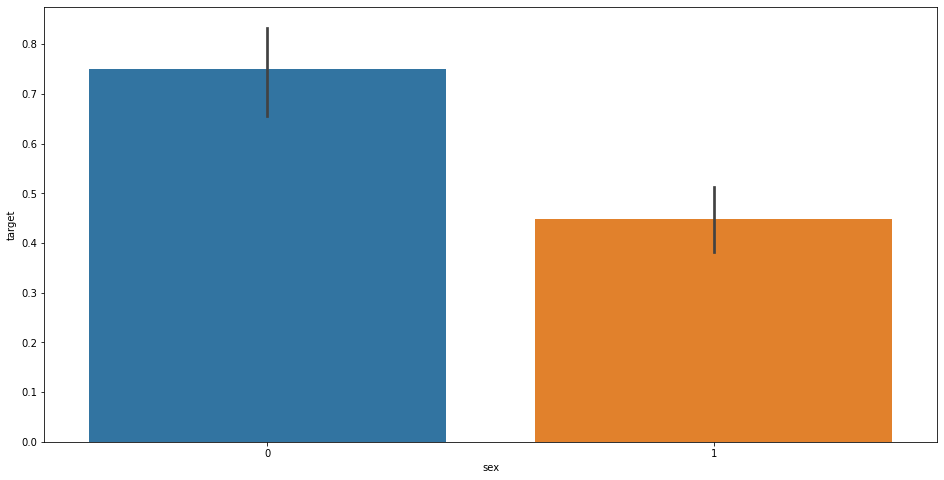

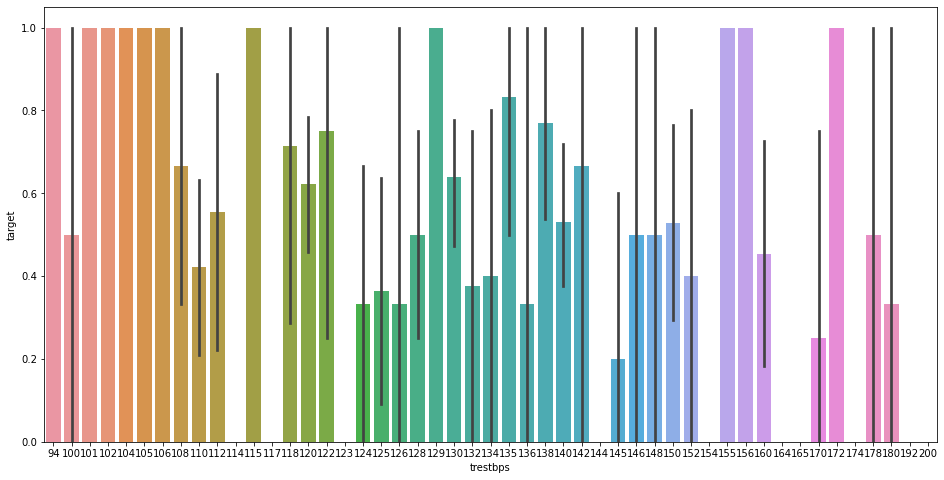

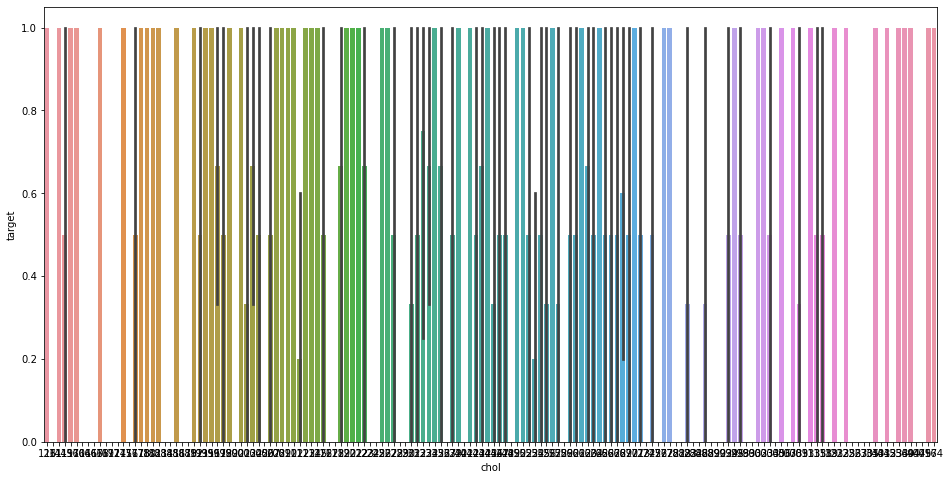

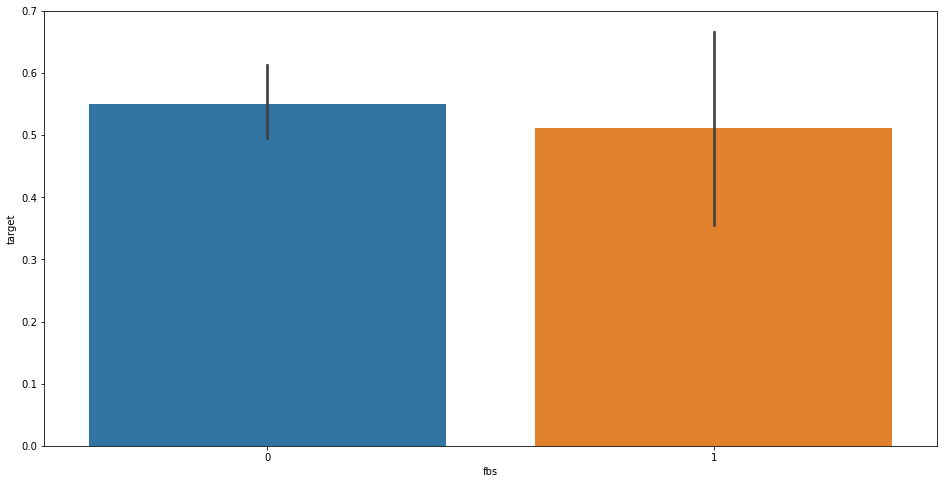

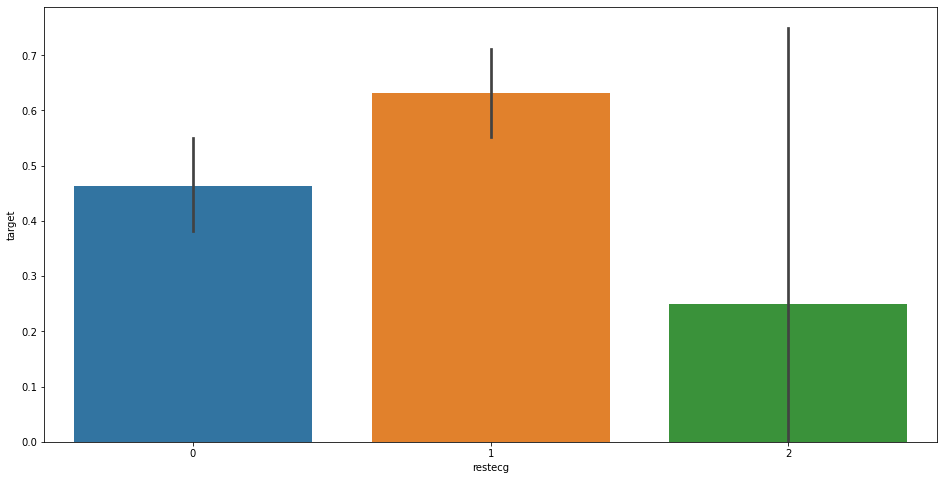

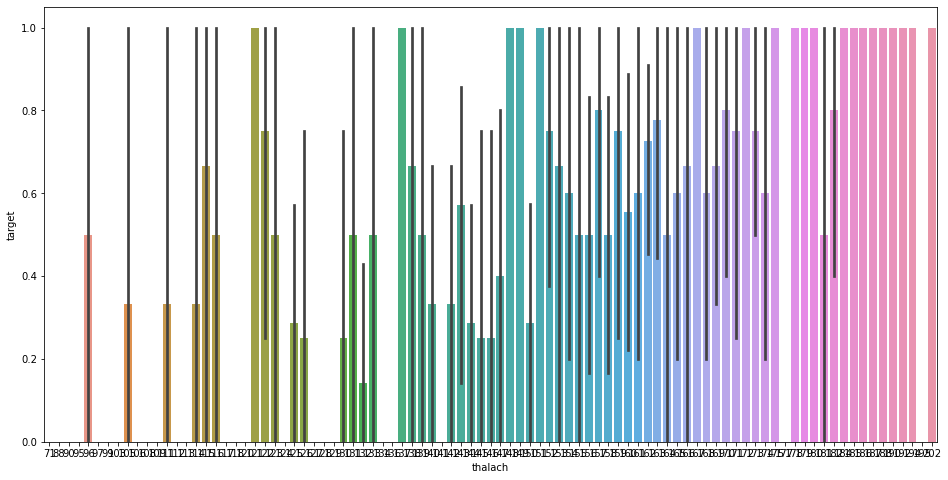

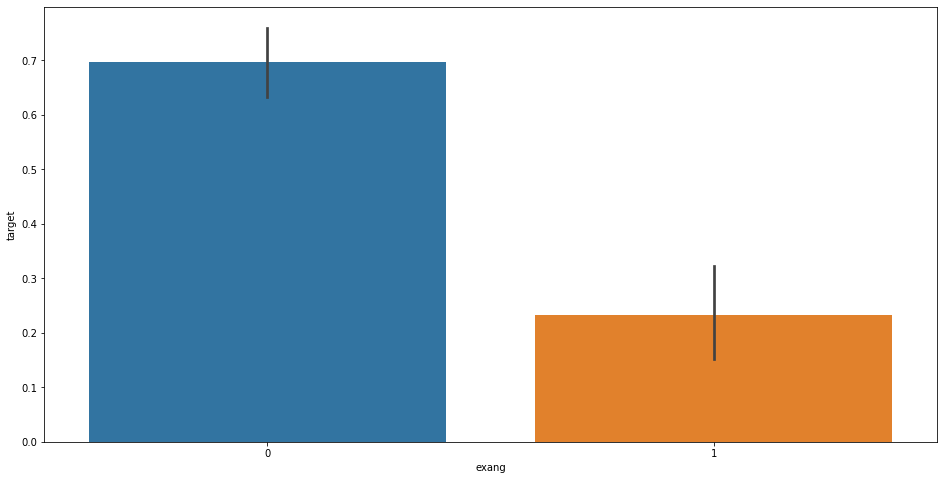

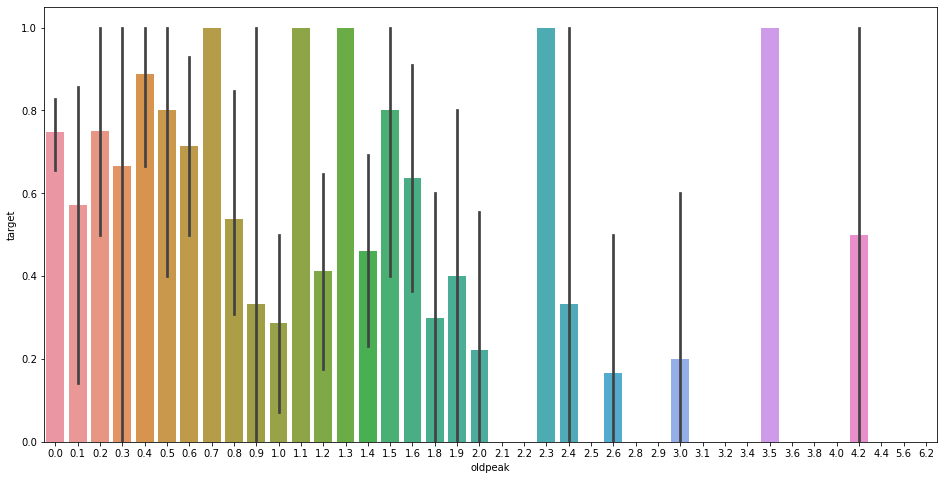

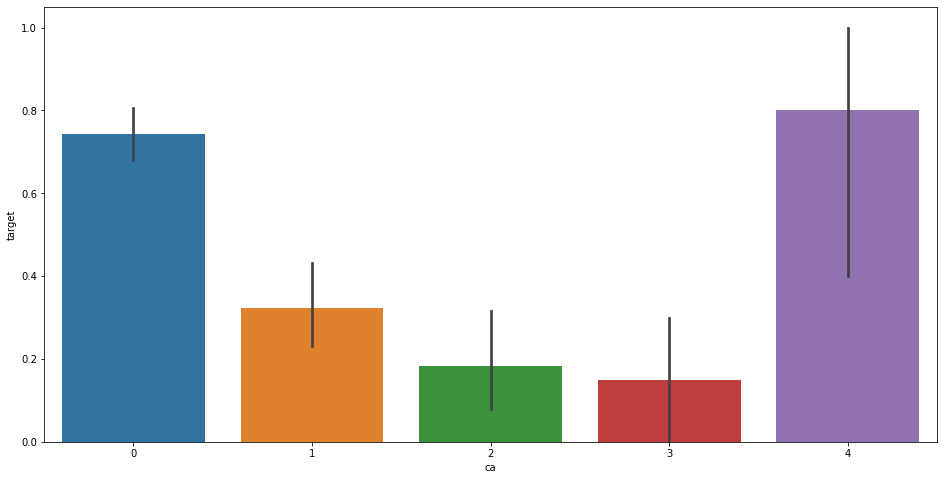

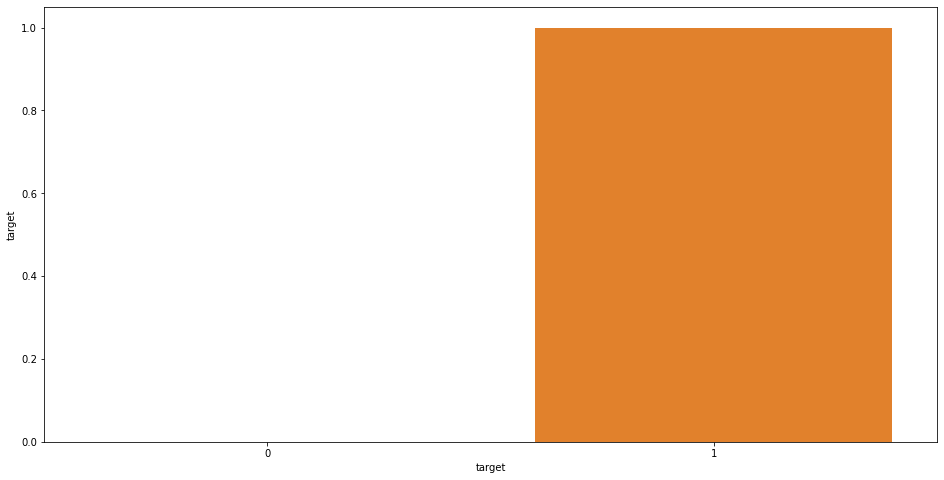

In [103]:
#Barplots
i=0 
for col in heart.columns:
    i=i+1
    if i <14 :
        figure = plt.figure(figsize=(16,8))
        sns.barplot(x=col,y="target",data=heart)
        plt.show()
    else :
        break
        

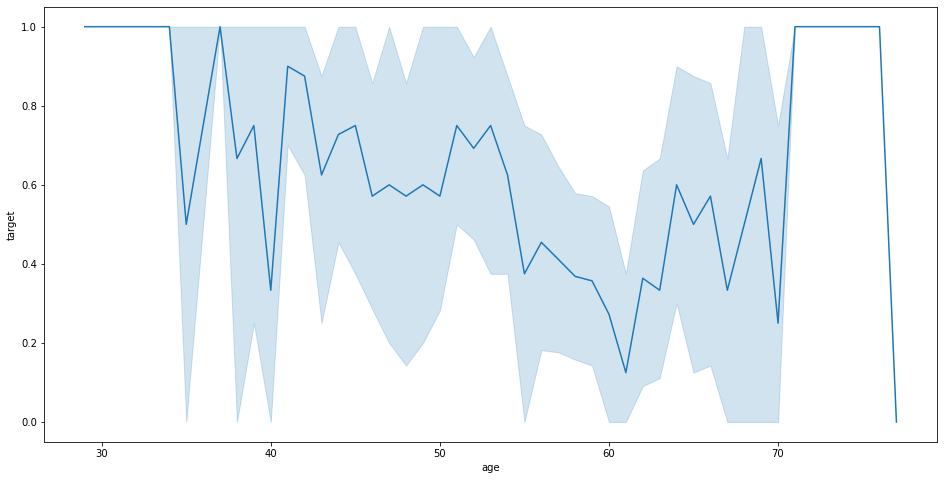

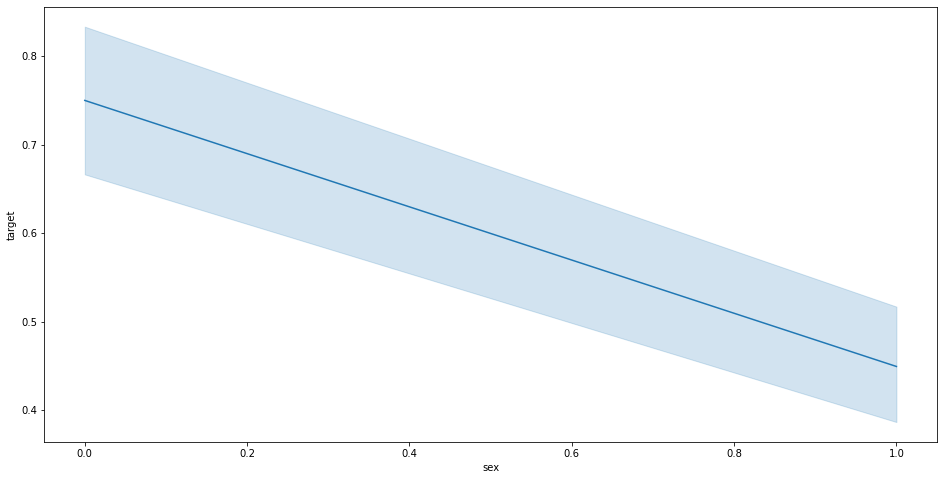

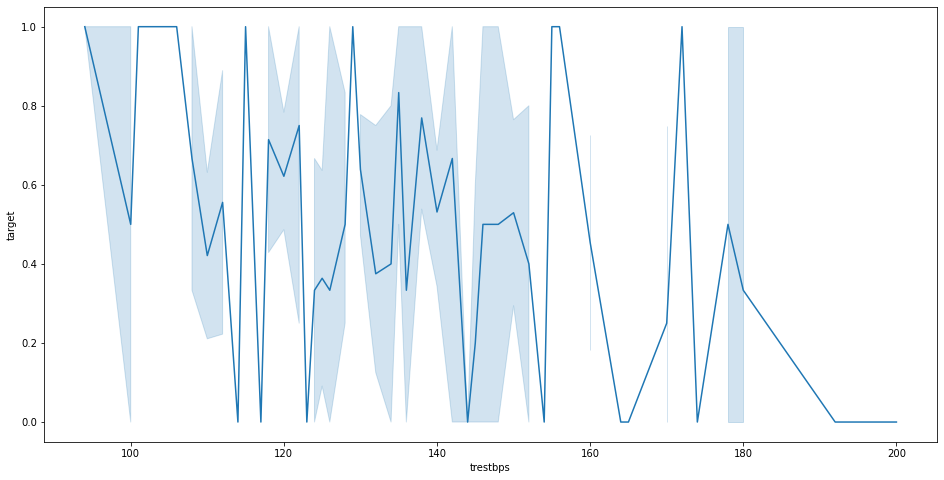

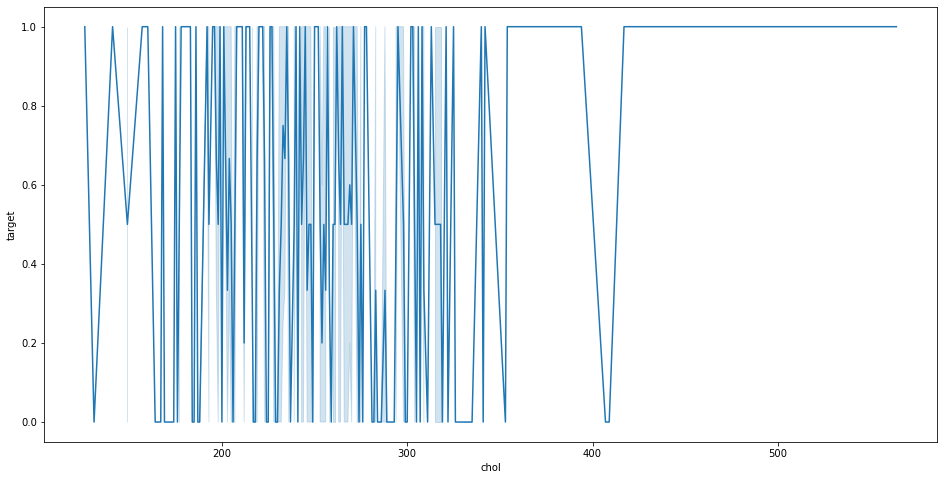

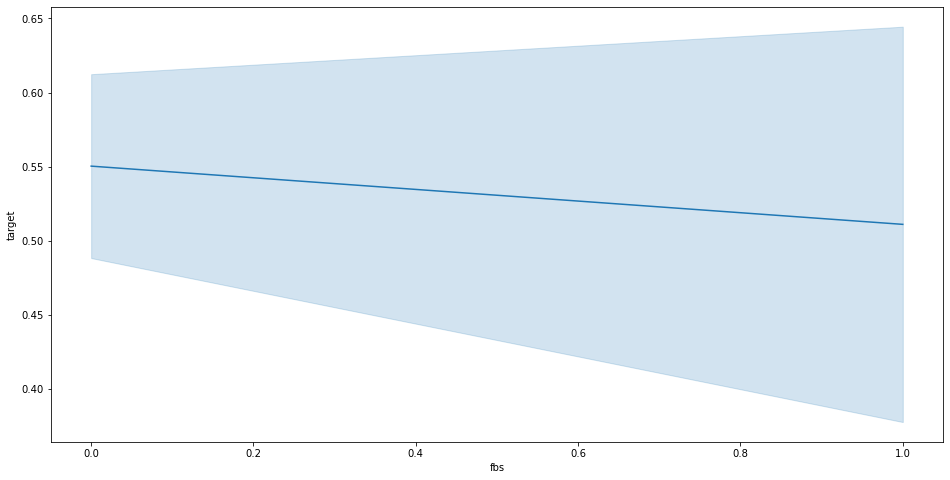

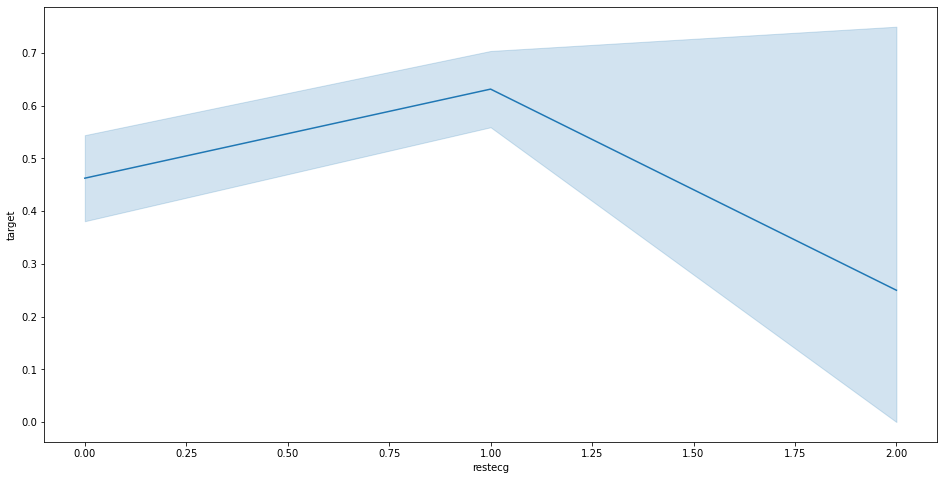

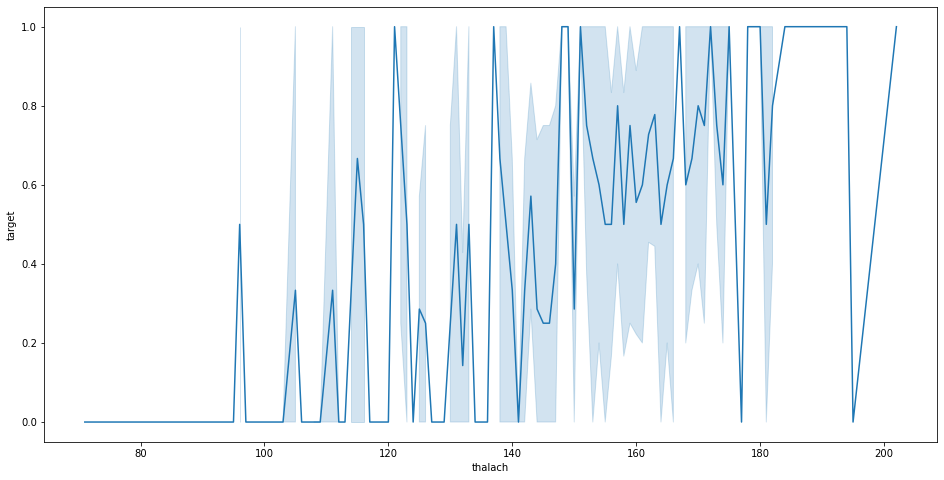

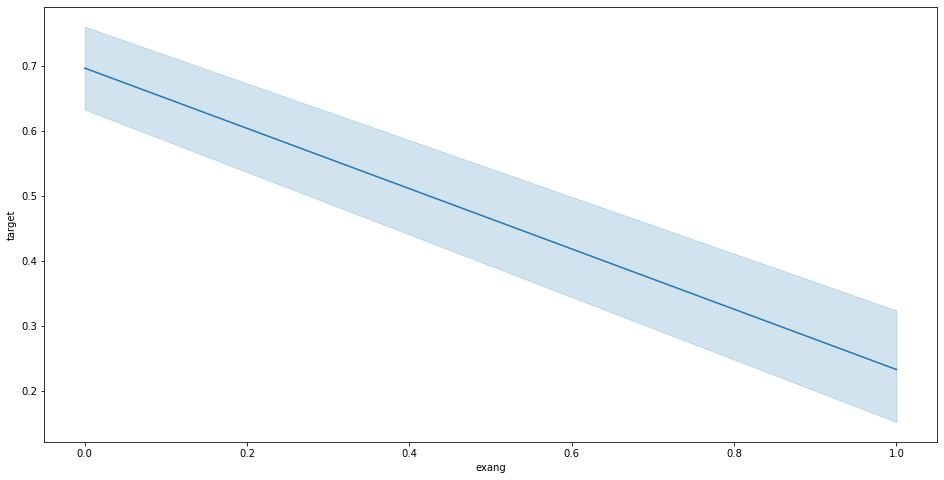

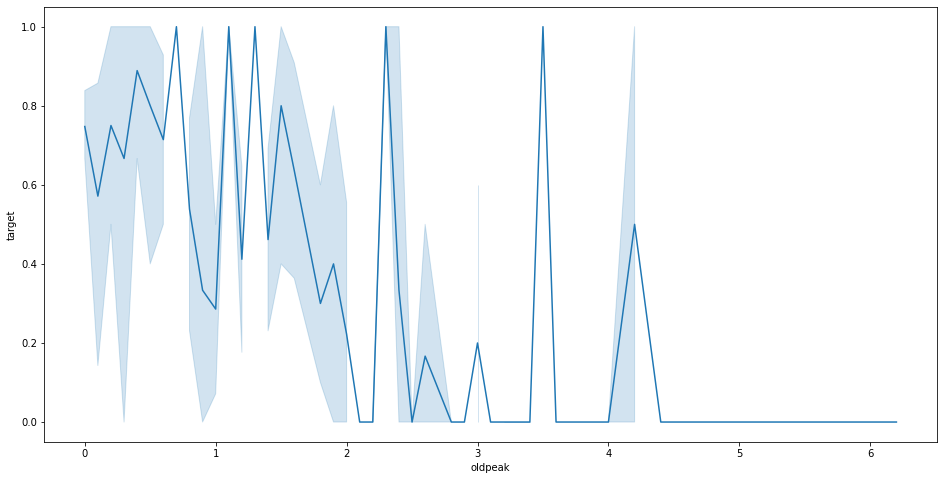

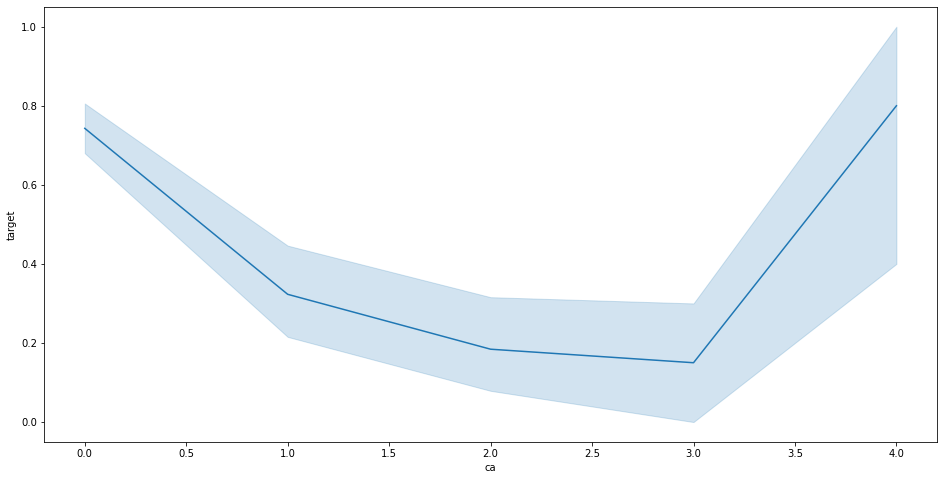

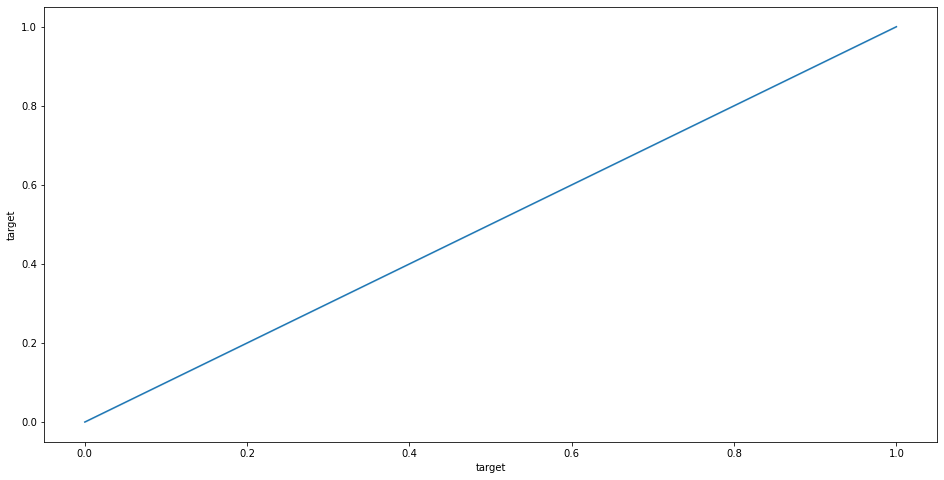

In [104]:
#Lineplots
i = 0
for col in heart.columns:
    i = i + 1
    if i < 14: # total 14 columns but we don't need output columns
        figure = plt.figure(figsize=(16,8))
        sns.lineplot(x=col,y="target",data=heart)
        plt.show()
    else:
        break

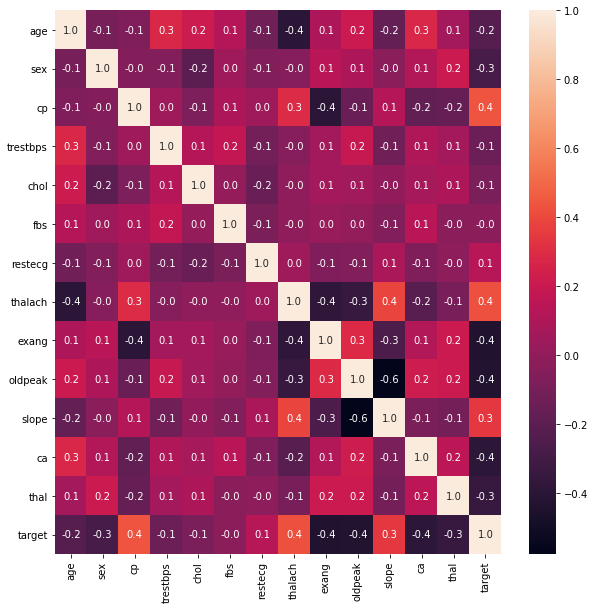

In [11]:
#correlation plot 
plt.figure(figsize=(10,10))
sns.heatmap(heart.corr(),annot=True,fmt='.1f')
plt.show()

In [12]:
heart.groupby('age_groups').describe()

age                                                        sex  \
            count       mean       std   min   25%   50%    75%   max  count   
age_groups                                                                     
(20, 29]      1.0  29.000000       NaN  29.0  29.0  29.0  29.00  29.0    1.0   
(29, 39]     15.0  36.800000  1.934647  34.0  35.0  37.0  38.50  39.0   15.0   
(39, 49]     72.0  44.333333  2.621686  40.0  42.0  44.0  46.00  49.0   72.0   
(49, 59]    125.0  55.032000  2.848135  50.0  52.0  55.0  58.00  59.0  125.0   
(59, 69]     80.0  63.762500  2.644525  60.0  62.0  64.0  66.00  69.0   80.0   
(69, 79]     10.0  72.000000  2.666667  70.0  70.0  71.0  73.25  77.0   10.0   

                      ... thal      target                                     \
                mean  ...  75%  max  count      mean       std  min  25%  50%   
age_groups            ...                                                       
(20, 29]    1.000000  ...  2.0  2.0    1.0  1.000000       NaN  1.0  1.0  1.0   
(29, 39]    0.666667  ...  2.5  3.0   15.0  0.733333  0.457738  0.0  0.5  1.0   
(39, 49]    0.736111  ...  3.0  3.0   72.0  0.694444  0.463875  0.0  0.0  1.0   
(49, 59]    0.728000  ...  3.0  3.0  125.0  0.520000  0.501610  0.0  0.0  1.0   
(59, 69]    0.587500  ...  3.0  3.0   80.0  0.400000  0.492989  0.0  0.0  0.0   
(69, 79]    0.500000  ...  2.0  3.0   10.0  0.600000  0.516398  0.0  0.0  1.0   

                      
            75%  max  
age_groups            
(20, 29]    1.0  1.0  
(29, 39]    1.0  1.0  
(39, 49]    1.0  1.0  
(49, 59]    1.0  1.0  
(59, 69]    1.0  1.0  
(69, 79]    1.0  1.0  

[6 rows x 112 columns]

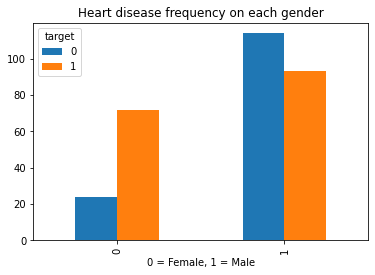

In [13]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar")
plt.title("Heart disease frequency on each gender")
plt.xlabel("0 = Female, 1 = Male")
plt.show()

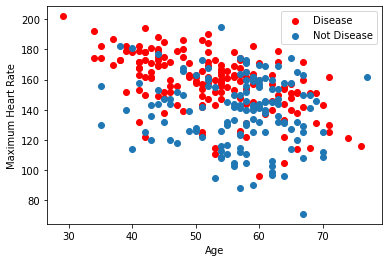

In [14]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [15]:
#Transform the non-numeric data into numeric
le=LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in heart.columns.to_numpy():
    # Compare if the dtype is object
    if heart[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        heart[col]=le.fit_transform(heart[col])

In [16]:
heart = heart.drop(columns = ['cp', 'thal', 'slope',"age_groups"])

In [23]:
#Lets create the 2 sets
heart.columns
X=np.asarray(heart[['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca']])
y=np.asarray(heart["target"])

In [24]:
heart.dtypes

age           int64
sex           int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
ca            int64
target        int64
dtype: object

In [25]:
#Normalize the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806, -0.71442887],
       [-1.91531289,  0.68100522, -0.09273778,  0.07219949, -0.41763453,
         0.89896224,  1.63347147, -0.69663055,  2.12257273, -0.71442887],
       [-1.47415758, -1.46841752, -0.09273778, -0.81677269, -0.41763453,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206, -0.71442887],
       [ 0.18017482,  0.68100522, -0.66386682, -0.19835726, -0.41763453,
         0.89896224,  1.23989692, -0.69663055, -0.20670527, -0.71442887],
       [ 0.29046364, -1.46841752, -0.66386682,  2.08204965, -0.41763453,
         0.89896224,  0.58393935,  1.43548113, -0.37924438, -0.71442887]])

In [26]:
#Split of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


In [27]:
#Modeling with scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [29]:
#Predictions using test set
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.30034947, 0.69965053],
       [0.715599  , 0.284401  ],
       [0.39799713, 0.60200287],
       [0.20258917, 0.79741083],
       [0.43709432, 0.56290568],
       [0.43243224, 0.56756776],
       [0.60535902, 0.39464098],
       [0.25741194, 0.74258806],
       [0.62455716, 0.37544284],
       [0.46949726, 0.53050274],
       [0.45908763, 0.54091237],
       [0.26962059, 0.73037941],
       [0.38046024, 0.61953976],
       [0.51282171, 0.48717829],
       [0.38204921, 0.61795079],
       [0.76877346, 0.23122654],
       [0.38573979, 0.61426021],
       [0.33136   , 0.66864   ],
       [0.70320377, 0.29679623],
       [0.4245089 , 0.5754911 ],
       [0.2692017 , 0.7307983 ],
       [0.43373234, 0.56626766],
       [0.79680283, 0.20319717],
       [0.4841093 , 0.5158907 ],
       [0.42248673, 0.57751327],
       [0.67494605, 0.32505395],
       [0.46893183, 0.53106817],
       [0.35056976, 0.64943024],
       [0.54433744, 0.45566256],
       [0.72280925, 0.27719075],
       [0.

In [32]:
#Evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.6428571428571429

In [40]:
#Confusion matrix as another way of looking at the accuracy
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 7 18]]


Confusion matrix, without normalization
[[33  3]
 [ 7 18]]


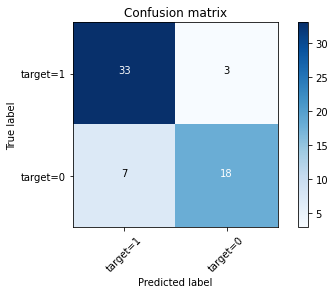

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')

In [42]:
#Confusion matrix metrics
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [43]:
#K-NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Training
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [45]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]


array([0, 0, 1, 1, 0], dtype=int64)

In [46]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.859504132231405
Test set Accuracy:  0.7540983606557377


In [47]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77, 0.67, 0.72, 0.75, 0.84, 0.82, 0.82, 0.82, 0.8 ])

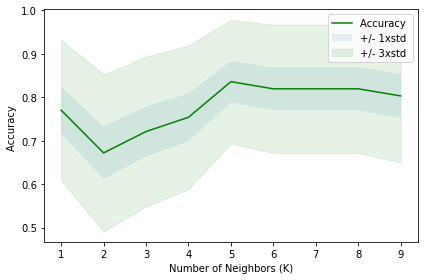

In [48]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [49]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8360655737704918 with k= 5


In [50]:
#Support Vector machine classification 
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [51]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 1, 1, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.84      0.89      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61

Confusion matrix, without normalization
[[19  6]
 [ 4 32]]


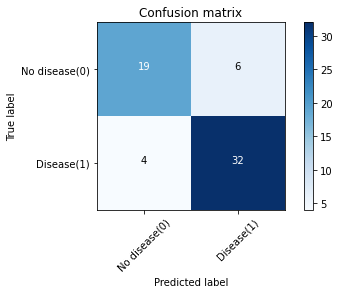

In [54]:
#Evaluation of the model
from sklearn.metrics import classification_report, confusion_matrix
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No disease(0)','Disease(1)'],normalize= False,  title='Confusion matrix')

In [66]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))

Shape of X training set (242, 10) &  Size of Y training set (242,)


In [67]:
#Decision tree
#modeling 
#1st we create an instance of DecisionTreeClassifier called diseaseTree.+
from sklearn.tree import DecisionTreeClassifier
diseaseTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
diseaseTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [68]:
#Fitting 
diseaseTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [69]:
#Prediction
predTree = diseaseTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 0 1 1 1]
[1 0 1 1 0]


In [70]:
#Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7540983606557377
